# CNMCData scraper
###### This is the site: http://data.cnmc.es/datagraph/jsp/inf_anual.jsp
###### Objective: automatically download and plot all latest data at the click of a button in order to quickly view spanish telecoms market

1. Download each wepsite csv file and convert it into a pandas dataframe <b>that can be converted to graph<b>
2. Create most intuitive graph for each dataframe and display (will usually be series vs time bar/line/scatter graph
3. Start by doing it for 'Datos generales del sector - Ingresos - Totales' only

In [10]:
# Datos generales del sector - Ingresos - Totales

In [11]:
import requests

headers = {
    'Connection': 'keep-alive',
    'Cache-Control': 'max-age=0',
    'Upgrade-Insecure-Requests': '1',
    'Origin': 'http://data.cnmc.es',
    'Content-Type': 'application/x-www-form-urlencoded',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Referer': 'http://data.cnmc.es/datagraph/jsp/informe_1_1.jsp?aqsdqsiid=29200&tipoinforme=1&periodicidad=2',
    'Accept-Language': 'en-GB-oxendict,en;q=0.9,es-ES;q=0.8,es;q=0.7',
}

data = {
  'aqsdqsiid': '29200',
  'solution': 'datagraph',
  'path': 'Informes',
  'autoSubmit': 'true',
  'showParameters': 'false',
  'paginate': 'false',
  'output-target': 'table/csv;page-mode=stream',
  'name': 'crosstab_tipo_01_tri.prpt'
}

file = requests.post('http://data.cnmc.es/pentaho/content/reporting', headers=headers, data=data, verify=False)

with open("res.csv", "wb+") as f:
    f.write(file.content)

import os

os.startfile("res.csv")

In [12]:
import pandas as pd
import io
import numpy as np

df = pd.read_csv(io.StringIO(file.content.decode('utf-8')))

In [13]:
df = df.iloc[3:]
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df.iloc[:3]
df = df.iloc[::2]
df = df.rename(columns={np.nan: 'Tipo de servicios'})
df.dropna(axis=1, how='all', inplace=True)
df

3,Tipo de servicios,I/2005,II/2005,III/2005,IV/2005,I/2006,II/2006,III/2006,IV/2006,I/2007,...,IV/2018,I/2019,II/2019,III/2019,IV/2019,I/2020,II/2020,III/2020,IV/2020,I/2021
4,Servicios minoristas,7610.59,8158.94,7765.94,0.00,8041.86,8435.88,8207.20,8784.47,8649.49,...,6410.50,6158.52,6210.32,6004.14,6382.38,5881.76,5509.96,5752.70,6031.56,5668.45
6,Servicios mayoristas,1716.53,1909.06,2087.66,0.00,1717.79,1831.92,1861.59,1734.60,1775.51,...,2304.85,2260.38,2357.76,2270.28,2363.90,2353.10,2281.96,2252.15,2444.88,2303.86


In [14]:
cols = df.columns.drop('Tipo de servicios')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df


3,Tipo de servicios,I/2005,II/2005,III/2005,IV/2005,I/2006,II/2006,III/2006,IV/2006,I/2007,...,IV/2018,I/2019,II/2019,III/2019,IV/2019,I/2020,II/2020,III/2020,IV/2020,I/2021
4,Servicios minoristas,7610.59,8158.94,7765.94,0.0,8041.86,8435.88,8207.20,8784.47,8649.49,...,6410.50,6158.52,6210.32,6004.14,6382.38,5881.76,5509.96,5752.70,6031.56,5668.45
6,Servicios mayoristas,1716.53,1909.06,2087.66,0.0,1717.79,1831.92,1861.59,1734.60,1775.51,...,2304.85,2260.38,2357.76,2270.28,2363.90,2353.10,2281.96,2252.15,2444.88,2303.86


In [15]:
df = df.set_index('Tipo de servicios')
df.head()
df = df.reset_index()
df = df.T
df = df.reset_index()
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df.reset_index(drop=True)
df.head()

,Tipo de servicios,Servicios minoristas,Servicios mayoristas
0,I/2005,7610.59,1716.53
1,II/2005,8158.94,1909.06
2,III/2005,7765.94,2087.66
3,IV/2005,0.0,0.0
4,I/2006,8041.86,1717.79


<AxesSubplot:>

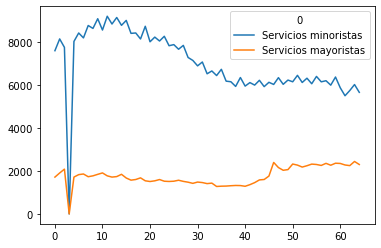

In [16]:
df.plot()